# Libaries and Tools
All libraries and tools loaded in one convivent code block to make the following code blocks plug and play(save for the feature extraction block).

In [20]:
#TODO: Added libaries and tools
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import os # to retrive data-set files
import cv2 # computer vision for extracting features from images
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from scipy.io import arff
from numpy.lib import average

TODO:

In [2]:
#Adjust images and model to work with RGB
#Hyperparameter optimization with Grid Search / Bayesian Optim
#check if non-linear SVM works better / try other SVMs in general

# Feature Extraction and Processing
This puts the data in a pandas dataframe data type making it accessible for all models.
The data will be stored in seperate train and test data sets.

In [22]:
# function to load dataset into a data frame
# Encaplsated in a function to restrict the scope of variables that will not be needed in
# later code blocks.
# gray scale flag, by default it's off
# ResizeX and ResizeY, fills these to resize image to desired size, if either
# is 0 it's assumed to be off
def loadData(grayscale:bool = False, resizeX: int = 0, resizeY = 0):
    # helper function to fill the data variables with data from images
    def fillData(data: dict,dir: str, label:str):
        # list of all files in dir
        # these values are the image files
        list = os.listdir(dir)
        # append image paths and labels in data dictionary
        for image in list:
            absImagePath = os.path.join(dir,image)
            data['image'].append(absImagePath)
            data['label'].append(label)
            fileImage = cv2.imread(absImagePath)
            # image gray scale
            if(grayscale == True):
                fileImage = cv2.cvtColor(fileImage,cv2.COLOR_BGR2GRAY)
            if(resizeX > 0 and resizeY > 0):
                target_size = (resizeX,resizeY)
                fileImage = cv2.resize(fileImage,target_size)
            data['features'].append(fileImage.flatten())
            
    # dictionary to temporary house the data
    # image = image path list, label = fake or real
    trainData = {'image':[],'label':[], 'features':[]}
    testData = {'image':[],'label':[], 'features':[]}
   
    # Read Train folder & Read test folder
    # OS module used to ensure this works on all platforms that python runs on
    currentDir = os.getcwd() # get's current directory to later append to image filepath for abs path
    trainDirReal = os.path.join(currentDir,"train",'REAL') # abs file path to real class folder in training
    trainDirFake = os.path.join(currentDir,'train','FAKE')
    testDirReal = os.path.join(currentDir,"test",'REAL')
    testDirFake = os.path.join(currentDir,"test",'FAKE')  


    # helper function read file list from each folder and append abs path and labels
    fillData(trainData,trainDirReal,'REAL')
    fillData(trainData,trainDirFake,'FAKE')
    fillData(testData,testDirReal,'REAL')
    fillData(testData,testDirFake,'FAKE')
    
    #TODO: Feature extraction
    
    # converts from dictionary type to dataframe for ease of access and compadability with
    # ML library function calls
    return pd.DataFrame(trainData), pd.DataFrame(testData)
# executes function, returning 2 dataframes containing train and test data of the calsses
# Train and test data are seperated into different dataframes to enforce data hygiene 
trainData,testData = loadData()
# test if data was loaded successfully by outputing first 10 entries
trainData.head(10)
       

In [4]:
#SVMs can't havve vector features so I mapped the feature column to a separate dataframe
x1 = trainData['features']
df1 = pd.DataFrame.from_records(x1)
x2 = testData['features']
df2 = pd.DataFrame.from_records(x2)

df1

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,151,123,161,136,143,143,137,144,145,150,...,47,49,45,44,49,45,47,44,58,118
1,223,208,204,216,220,207,193,189,168,170,...,60,84,78,103,125,131,135,135,117,92
2,177,177,178,179,179,180,181,181,183,184,...,78,141,190,190,190,190,190,190,190,190
3,108,29,26,51,56,54,55,85,143,151,...,88,89,91,90,89,87,85,82,80,78
4,163,164,165,166,166,166,166,165,166,159,...,63,66,65,65,67,71,72,70,67,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,65,90,37,18,36,30,15,36,135,...,104,116,118,123,117,94,73,68,78,87
19996,11,12,14,15,16,17,18,19,22,23,...,115,114,117,115,114,115,116,116,114,112
19997,83,84,81,78,84,95,98,94,98,102,...,145,156,151,156,154,147,147,155,157,152
19998,36,40,46,51,55,57,60,62,72,73,...,75,71,84,89,79,58,55,49,43,40


In [27]:
#turning test and train data into csvs. running this block NOT REQUIRED
from pathlib import Path
fpath = Path(os.getcwd() + "/csvs/trainData.csv")
fpath2 = Path(os.getcwd() + "/csvs/testData.csv")
trainData.to_csv(fpath)
testData.to_csv(fpath2)
trainData = pd.read_csv(fpath)
testData = pd.read_csv(fpath2)

# Exploratory Analysis
We can analysis the data set to justify the rationale of certains models. This can be down in the python code block below and even split across blocks.

In [ ]:
# Exploratory Analysis

# Models
We segment models in different code blocks and clearly label them in markdown and even explain results.

Support Vector Machine


In [9]:
scaler = StandardScaler()
svm = LinearSVC(C = 0.001, loss = "hinge", max_iter = 1000000, random_state = 42, dual=True)
scaled_svm = Pipeline([("scaler", scaler), ("linear_svc", svm),])
X_train = df1
y_train = trainData['label']
scaled_svm.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=0.001, dual=True, loss='hinge', max_iter=1000000,
                           random_state=42))])

Parameter Tuning

In [16]:
#keeping a record of results based on selected hyperparameters
#doing preliminary testing to find appropriate ranges for bayesian optimization
#grid search is also a potential option

#What is C?: 
#from https://stackoverflow.com/questions/12809633/parameter-c-in-svm-standard-to-find-best-parameter#:~:text=C%20parameter%20in%20SVM%20is,can%20misclassify%20any%20single%20point.
# Take it this way. C parameter in SVM is Penalty parameter of the error term. 
# You can consider it as the degree of correct classification that the algorithm has 
# to meet or the degree of optimization the the SVM has to meet.
# For greater values of C, there is no way that SVM optimizer can misclassify any single point.
# Yes, as you said, the tolerance of the SVM optimizer is high for higher values of C . 
# But for Smaller C, SVM optimizer is allowed at least some degree of freedom so as to meet the best hyperplane !

#https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel also has some good definitions/explanations
#I put these here cause I am terrible at explaining it


#Grayscale = TRUE

# C = 1, loss = 'hinge', max_iter = 10000 : 
# Test Accuracy: 0.6255
# Test Precision: 0.625508439187451
# Test Recall: 0.6255
#               precision    recall  f1-score   support

#         FAKE       0.62      0.63      0.63      5000
#         REAL       0.63      0.62      0.62      5000

#     accuracy                           0.63     10000
#    macro avg       0.63      0.63      0.63     10000
# weighted avg       0.63      0.63      0.63     10000


# C = 1, loss = 'hinge', max_iter = 100000: 
# Test Accuracy: 0.6246
# Test Precision: 0.6246105470367012
# Test Recall: 0.6246
#               precision    recall  f1-score   support

#         FAKE       0.62      0.63      0.63      5000
#         REAL       0.63      0.62      0.62      5000

#     accuracy                           0.62     10000
#    macro avg       0.62      0.62      0.62     10000
# weighted avg       0.62      0.62      0.62     10000

# C = 0.1, loss = 'hinge', max_iter = 100000: 
# Test Accuracy: 0.6286
# Test Precision: 0.6286398474791551
# Test Recall: 0.6286
#               precision    recall  f1-score   support

#         FAKE       0.63      0.64      0.63      5000
#         REAL       0.63      0.62      0.63      5000

#     accuracy                           0.63     10000
#    macro avg       0.63      0.63      0.63     10000
# weighted avg       0.63      0.63      0.63     10000

# C = 10, loss = 'hinge', max_iter = 100000: 
# Test Accuracy: 0.626
# Test Precision: 0.6260039514839185
# Test Recall: 0.626
#               precision    recall  f1-score   support

#         FAKE       0.63      0.63      0.63      5000
#         REAL       0.63      0.62      0.62      5000

#     accuracy                           0.63     10000
#    macro avg       0.63      0.63      0.63     10000
# weighted avg       0.63      0.63      0.63     10000

# C = 1, loss = 'hinge', max_iter = 1000000: 
# Test Accuracy: 0.6248
# Test Precision: 0.6248179737882253
# Test Recall: 0.6248
#               precision    recall  f1-score   support

#         FAKE       0.62      0.63      0.63      5000
#         REAL       0.63      0.62      0.62      5000

#     accuracy                           0.62     10000
#    macro avg       0.62      0.62      0.62     10000
# weighted avg       0.62      0.62      0.62     10000

# C = 10, loss = 'hinge', max_iter = 1000000:
# Test Accuracy: 0.6255
# Test Precision: 0.6255036596867165
# Test Recall: 0.6255
#               precision    recall  f1-score   support

#         FAKE       0.62      0.63      0.63      5000
#         REAL       0.63      0.62      0.62      5000

#     accuracy                           0.63     10000
#    macro avg       0.63      0.63      0.63     10000
# weighted avg       0.63      0.63      0.63     10000

# C = 0.01, loss = 'hinge', max_iter = 1000000:
# Test Accuracy: 0.6358
# Test Precision: 0.6359223300970874
# Test Recall: 0.6358
#               precision    recall  f1-score   support

#         FAKE       0.63      0.65      0.64      5000
#         REAL       0.64      0.62      0.63      5000

#     accuracy                           0.64     10000
#    macro avg       0.64      0.64      0.64     10000
# weighted avg       0.64      0.64      0.64     10000

# C = 0.001, loss = 'hinge', max_iter = 1000000:
# Test Accuracy: 0.6431
# Test Precision: 0.6435863614670155
# Test Recall: 0.6431
#               precision    recall  f1-score   support

#         FAKE       0.64      0.67      0.65      5000
#         REAL       0.65      0.61      0.63      5000

#     accuracy                           0.64     10000
#    macro avg       0.64      0.64      0.64     10000
# weighted avg       0.64      0.64      0.64     10000

# C = 0.00001, loss = 'hinge', max_iter = 1000000:
# Test Accuracy: 0.6314
# Test Precision: 0.6320470304492011
# Test Recall: 0.6314
#               precision    recall  f1-score   support

#         FAKE       0.62      0.67      0.64      5000
#         REAL       0.64      0.60      0.62      5000

#     accuracy                           0.63     10000
#    macro avg       0.63      0.63      0.63     10000
# weighted avg       0.63      0.63      0.63     10000

#TODO: Grayscale = FALSE






Results

In [7]:
X_test = df2
y_test = testData['label']

In [10]:
predictions = scaled_svm.predict(X_test)
print("Test Accuracy: {}".format(accuracy_score(y_test, predictions)))
print("Test Precision: {}".format(precision_score(y_test,predictions, average = 'weighted')))
print("Test Recall: {}".format(recall_score(y_test,predictions, average = 'weighted')))

cr = classification_report(y_test, predictions);
print(cr);

Test Accuracy: 0.6431
Test Precision: 0.6435863614670155
Test Recall: 0.6431
              precision    recall  f1-score   support

        FAKE       0.64      0.67      0.65      5000
        REAL       0.65      0.61      0.63      5000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



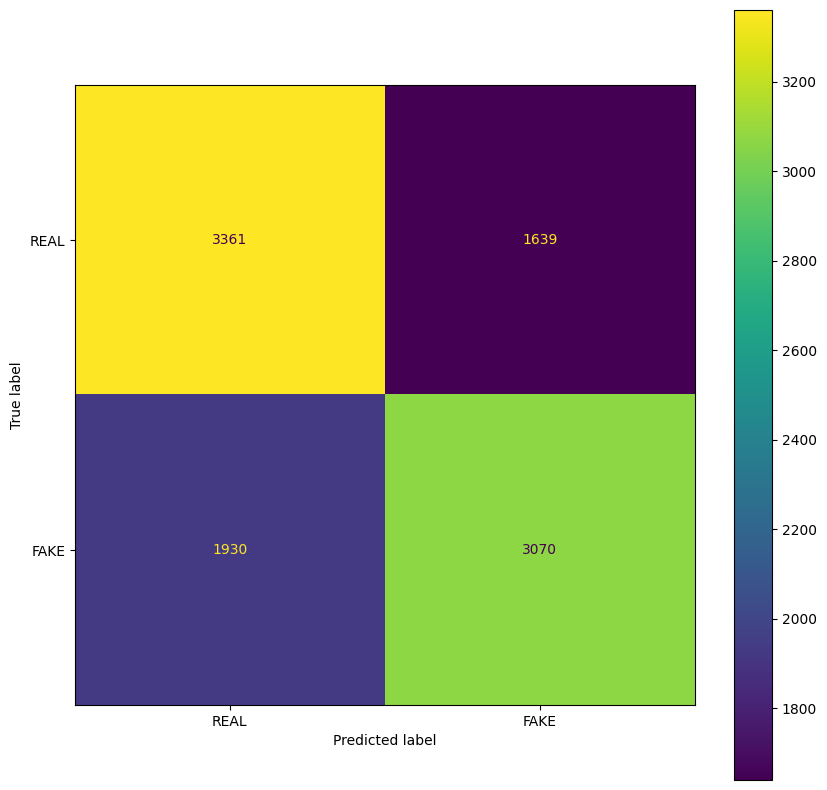

In [21]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["REAL", "FAKE"])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

## Sample Modle 2 Header

In [ ]:
# model 2 code block